In [141]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import os

from statsmodels.tsa.api import ExponentialSmoothing, SimpleExpSmoothing, Holt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

import warnings
warnings.filterwarnings('ignore')

In [143]:
df = pd.read_csv(r"C:\Users\Nidhisha Shetty\Desktop\jupyter\Data\ONGC Historical Data.csv")

In [145]:
df.shape

(992, 7)

In [147]:
df.head()

,Date,Price,Open,High,Low,Vol.,Change %
0,04-10-2024,295.25,297.0,299.70,293.20,23.10M,1.10%
1,03-10-2024,292.05,295.0,298.00,290.55,28.12M,0.03%
2,01-10-2024,291.95,297.0,299.15,290.70,10.92M,-1.90%
3,30-09-2024,297.60,297.0,301.80,293.75,16.29M,0.13%
4,27-09-2024,297.20,292.7,298.45,289.70,35.71M,0.68%


In [149]:
df.tail # if you dont add () at the end

<bound method NDFrame.tail of            Date   Price   Open    High     Low    Vol. Change %
0    04-10-2024  295.25  297.0  299.70  293.20  23.10M    1.10%
1    03-10-2024  292.05  295.0  298.00  290.55  28.12M    0.03%
2    01-10-2024  291.95  297.0  299.15  290.70  10.92M   -1.90%
3    30-09-2024  297.60  297.0  301.80  293.75  16.29M    0.13%
4    27-09-2024  297.20  292.7  298.45  289.70  35.71M    0.68%
..          ...     ...    ...     ...     ...     ...      ...
987  12-10-2020   69.15   70.3   70.60   68.80  10.56M   -1.64%
988  09-10-2020   70.30   69.0   70.60   68.25  25.75M    2.70%
989  08-10-2020   68.45   70.9   71.00   68.25  21.35M   -2.91%
990  07-10-2020   70.50   69.3   73.35   69.10  50.07M    1.66%
991  06-10-2020   69.35   70.0   70.20   69.00  10.03M    0.22%

[992 rows x 7 columns]>

In [151]:
print(f"{df.loc[:,'Date'][0]} to {df.loc[:,'Date'][len(df)-1]}")

04-10-2024 to 06-10-2020


In [153]:
df['Date'] = pd.to_datetime(df['Date'], dayfirst=True)
#converts df from strings (or other formats) to datetime objects

In [155]:
df.head()

,Date,Price,Open,High,Low,Vol.,Change %
0,2024-10-04,295.25,297.0,299.70,293.20,23.10M,1.10%
1,2024-10-03,292.05,295.0,298.00,290.55,28.12M,0.03%
2,2024-10-01,291.95,297.0,299.15,290.70,10.92M,-1.90%
3,2024-09-30,297.60,297.0,301.80,293.75,16.29M,0.13%
4,2024-09-27,297.20,292.7,298.45,289.70,35.71M,0.68%


In [157]:
df.drop(columns=['Open', 'High', 'Low', 'Vol.', 'Change %'], inplace=True, errors='ignore')

In [159]:
df = df.set_index('Date')

In [161]:
df.head()

,Price
Date,
2024-10-04,295.25
2024-10-03,292.05
2024-10-01,291.95
2024-09-30,297.60
2024-09-27,297.20


In [164]:
complete_dates = pd.date_range(start=df.index.min(), end=df.index.max(), freq='D')

In [166]:
df = df.reindex(complete_dates)
df.index.name = 'date'

In [168]:
df['Price'].fillna(method='ffill', inplace=True)

In [170]:
df.head()

,Price
date,
2020-10-06,69.35
2020-10-07,70.50
2020-10-08,68.45
2020-10-09,70.30
2020-10-10,70.30


In [174]:
df.shape

(1460, 1)

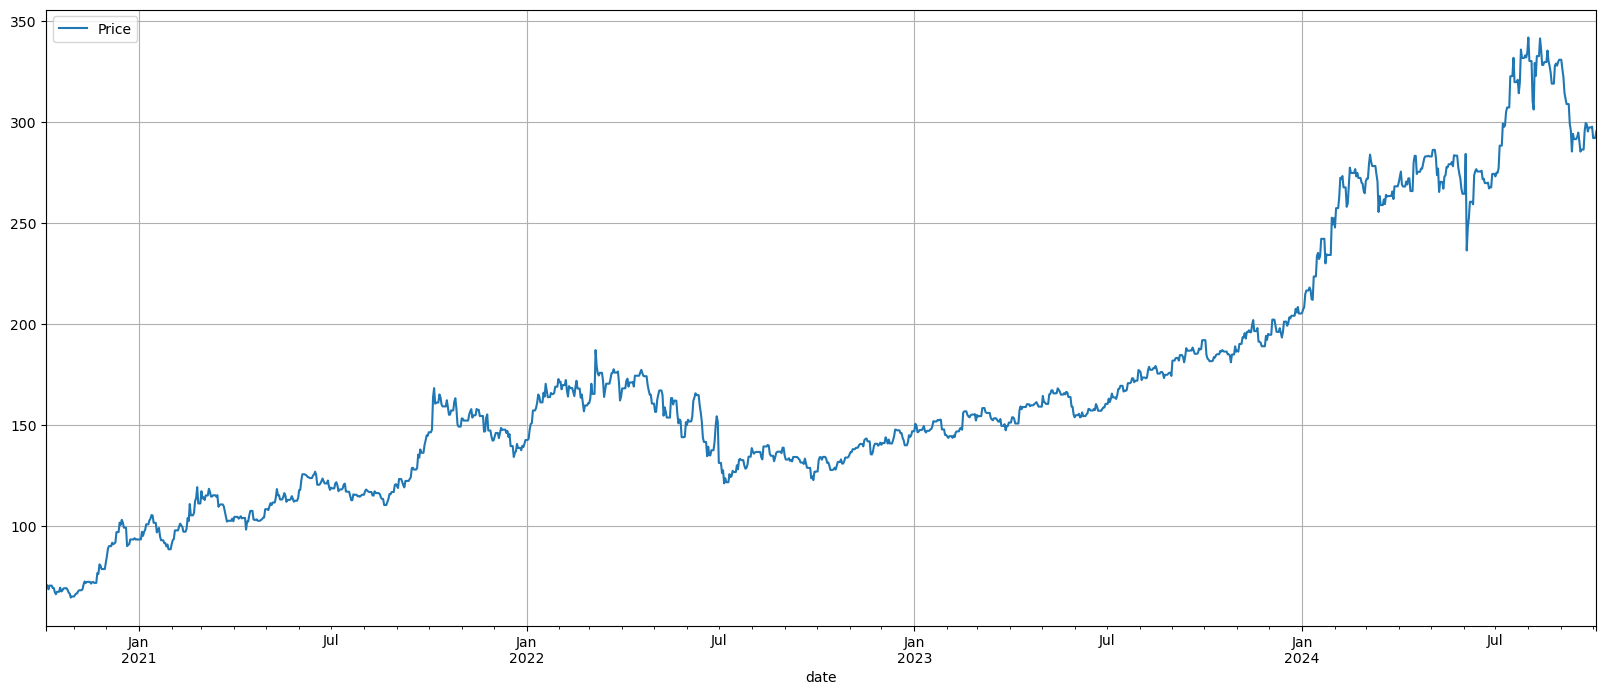

In [176]:
df.plot(figsize = (20,8))
plt.grid()
plt.show()

In [178]:
round(df.describe())

,Price
count,1460.0
mean,168.0
std,63.0
min,64.0
25%,128.0
50%,155.0
75%,185.0
max,342.0


<Axes: xlabel='date'>

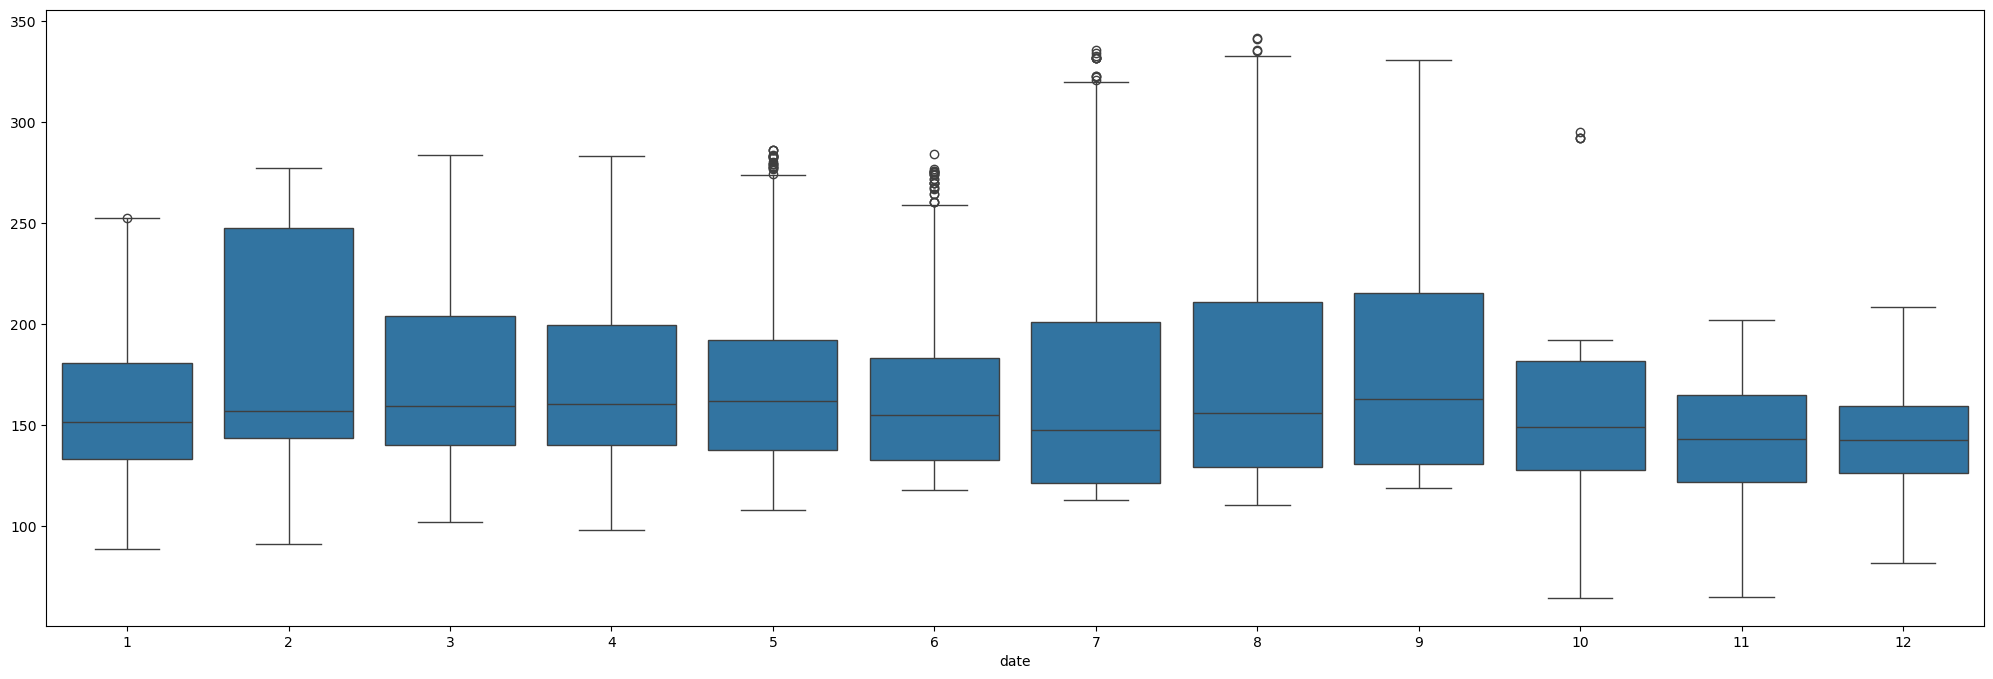

In [180]:
_, ax = plt.subplots(figsize=(25,8))
sns.boxplot(x = df.index.month , y=df.values[:,0],ax=ax )

<Axes: xlabel='date'>

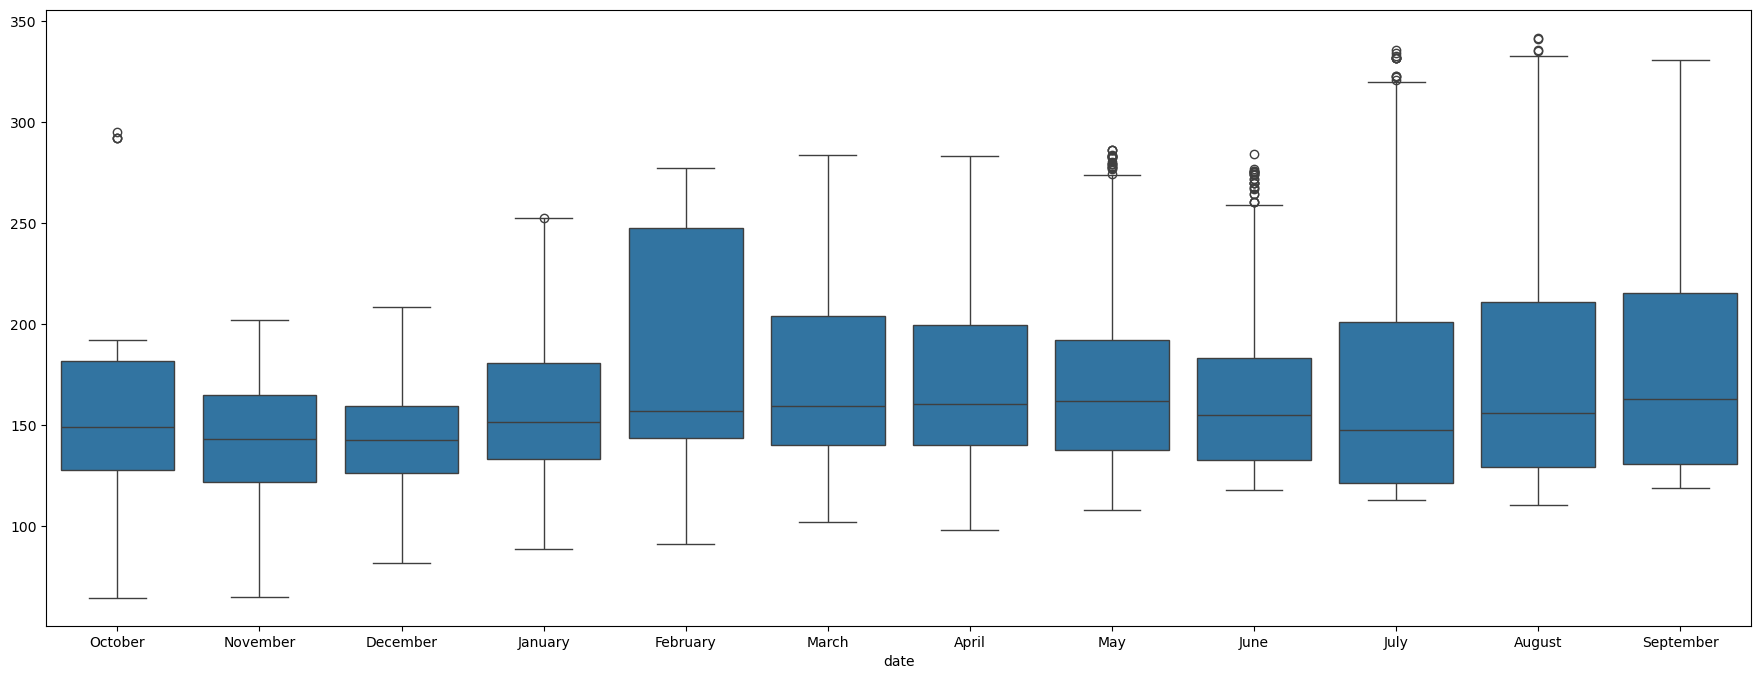

In [182]:
_, ax = plt.subplots(figsize=(22,8))
sns.boxplot(x = df.index.month_name() , y =df.values[:,0], ax=ax)

<Axes: xlabel='date'>

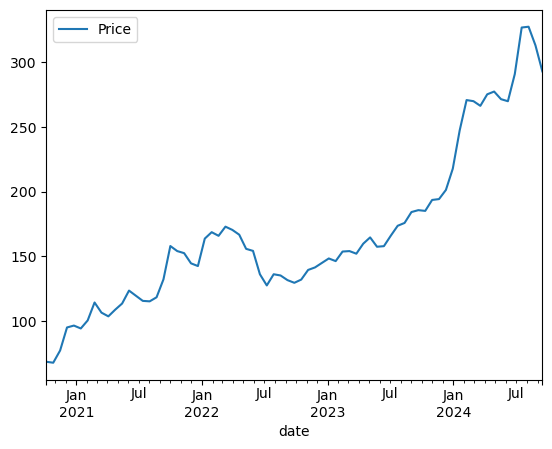

In [186]:
df_10days = df.resample('20D').mean()
df_10days.plot()

In [192]:
df_1 =df.groupby(df.index.month).mean().rename(columns = {'Price' : 'Mean'})
df_1 = df_1.merge(df.groupby(df.index.month).std().rename(columns = {'Price' : 'Std'}) , left_index = True , right_index =True)
df_1['Cov_pct'] = ((df_1['Std']/df_1['Mean'])*100).round(2)
df_1.head()

,Mean,Std,Cov_pct
date,,,
1,158.366935,47.870957,30.23
2,172.575221,61.323989,35.53
3,175.845161,58.136923,33.06
4,176.612500,62.403464,35.33
5,177.480645,61.120695,34.44


<Axes: xlabel='date'>

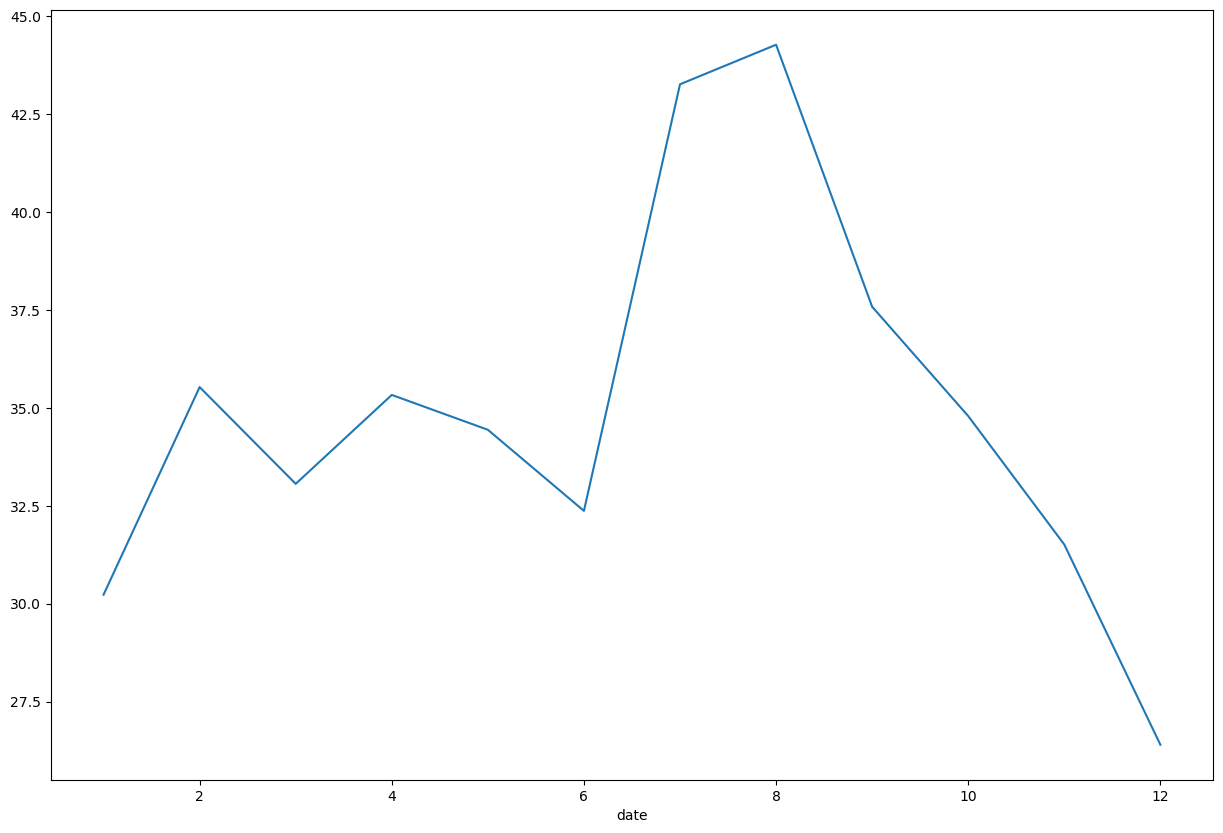

In [194]:
fig, ax = plt.subplots(figsize=(15,10))
df_1['Cov_pct'].plot()

In [196]:
train = df[0:1000]
test = df[1000:1460]

In [198]:
print(train.shape)

(1000, 1)


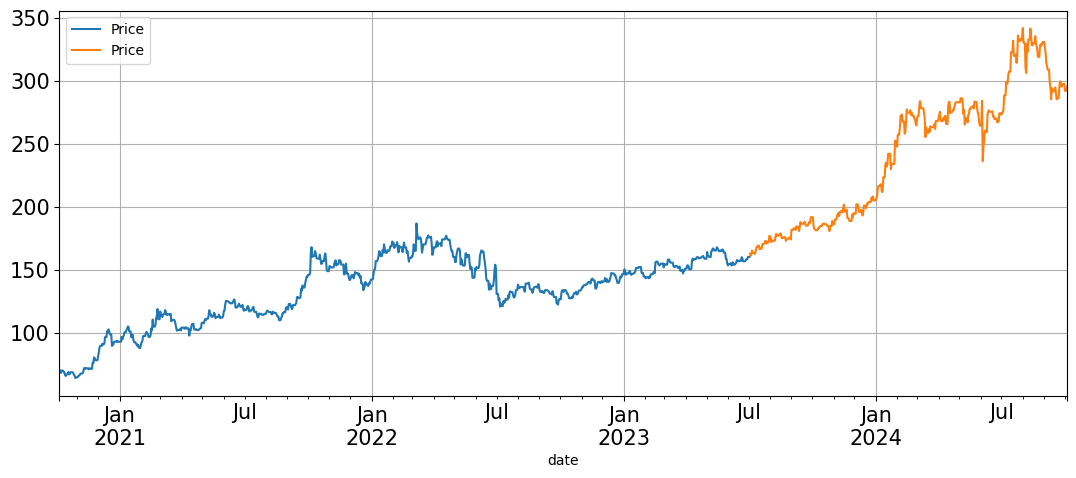

In [202]:
train['Price'].plot(figsize =(13,5), fontsize =15)
test['Price'].plot(figsize =(13,5), fontsize =15)
plt.grid()
plt.legend()

In [206]:
train_time = [i+1 for i in range(len(train))]
test_time = [i +len(train) for i in range(len(test))]
len(train_time), len(test_time)

(1000, 460)

In [208]:
LR_train = train.copy()
LR_test = test.copy()

In [210]:
LR_train['time'] = train_time
LR_test['time'] = test_time

In [218]:
lr = LinearRegression()
lr.fit(LR_train[['time']], LR_train['Price'].values)

LinearRegression()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


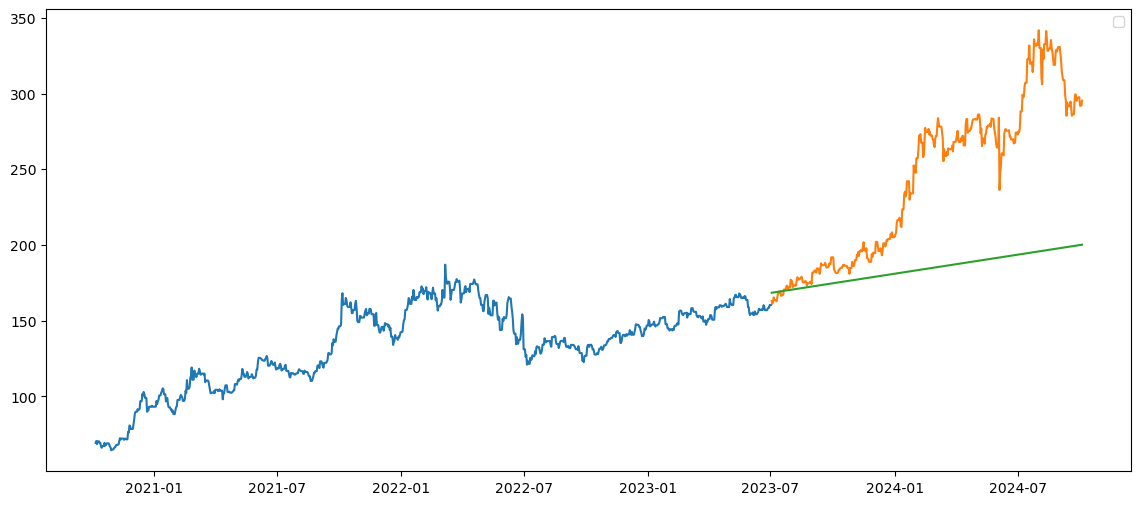

In [227]:
test_prediction_model = lr.predict(LR_test[['time']])
LR_test['forecast'] = test_prediction_model

plt.figure(figsize = (14,6))
plt.plot(train['Price'])
plt.plot(test['Price'])
plt.plot(LR_test['forecast'])
plt.legend()

In [229]:
train_time = [i+1 for i in range(len(train))]
test_time = [i+ len(train) for i in range(len(test))]
len(train_time), len(test_time)

(1000, 460)

In [231]:
LR_train = train.copy()
LR_test= test.copy()

In [247]:

LR_train['time'] = train_time
LR_test['time'] = test_time

In [249]:
lr = LinearRegression()
lr.fit(LR_train[['time']],LR_train['Price'].values)

LinearRegression()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


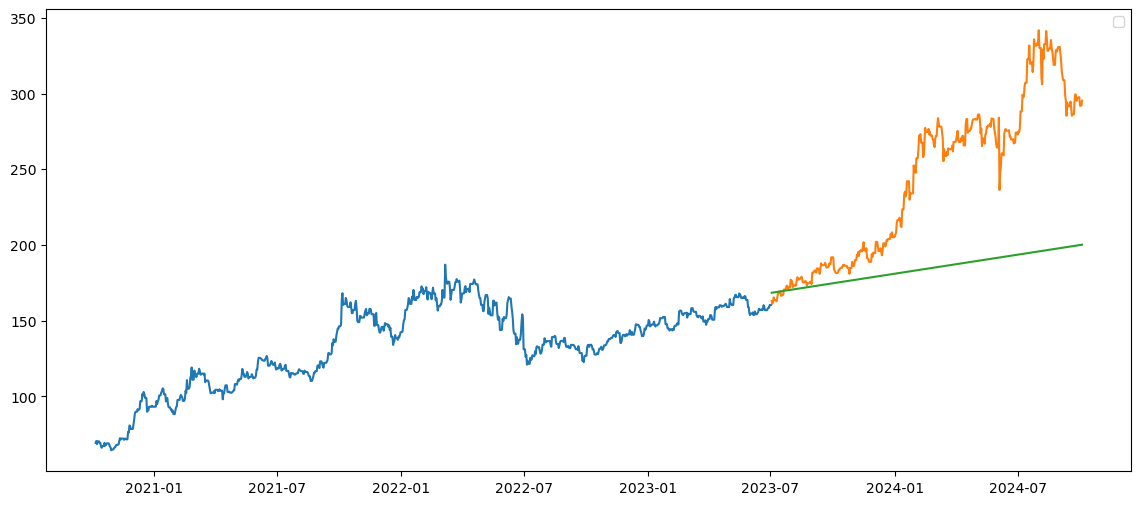

In [253]:
test_orediction_model = lr.predict(LR_test[['time']])
LR_test['forecast'] = test_prediction_model1

plt.figure(figsize =(14,6))
plt.plot(train['Price'])
plt.plot(test['Price'])
plt.plot(LR_test['forecast'])
plt.legend()

In [275]:
def mape(actual,pred):
    return round((np.mean(abs(actual - pred)/actual))*100,2)

In [279]:
mape_model1_test = mape(test['Price'].values,test_prediction_model1)
print(mape_model1_test)

21.23


In [281]:
results = pd.DataFrame({'Test Mape(%)' : [mape_model1_test]} , index = ['RegressionOnTime'])
results

,Test Mape(%)
RegressionOnTime,21.23


In [285]:
Naive_train =train.copy()
Naive_test =test.copy()

In [289]:
Naive_test['naive'] =np.asarray(train['Price'])[len(np.asarray(train['Price']))-1]
Naive_test['naive'].head()

date
2023-07-03    160.3
2023-07-04    160.3
2023-07-05    160.3
2023-07-06    160.3
2023-07-07    160.3
Freq: D, Name: naive, dtype: float64

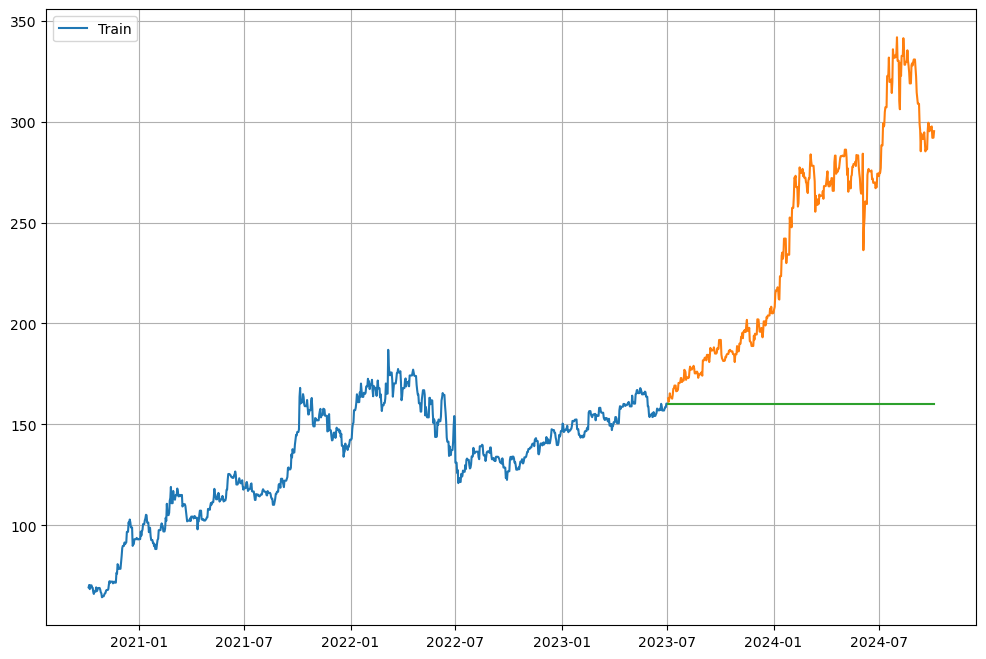

In [295]:
plt.figure(figsize=(12,8))
plt.plot(Naive_train['Price'], label ='Train')
plt.plot(test['Price'])
plt.plot(Naive_test['naive'])
plt.legend()
plt.grid()

In [299]:
mape_model2_test = mape(test['Price'].values,Naive_test['naive'].values)
print(mape_model2_test)

30.61


In [301]:
df.head()

,Price
date,
2020-10-06,69.35
2020-10-07,70.50
2020-10-08,68.45
2020-10-09,70.30
2020-10-10,70.30


In [305]:
final_model = ExponentialSmoothing(df,
                                   trend = 'additive',
                                   seasonal ='additive').fit(smoothing_level =0,
                                                            smoothing_trend = 0.1,
                                                            smoothing_seasonal = 0.1)

In [307]:
Mape_final_model = mape(df['Price'].values, final_model.fittedvalues)
print(Mape_final_model)

6.75


In [309]:
prediction = final_model.forecast(steps =len(test))

In [313]:
pred_df = pd.DataFrame({'lower_CI': prediction - 1.96*np.std(final_model.resid,ddof = 1),
                        'prediction': prediction,
                        'upper_CI': prediction + 1.96*np.std(final_model.resid,ddof = 1)})

In [315]:
pred_df.head()

,lower_CI,prediction,upper_CI
2024-10-05,280.255201,310.376801,340.498401
2024-10-06,280.255869,310.377469,340.499069
2024-10-07,281.826794,311.948394,342.069994
2024-10-08,279.764579,309.886179,340.007779
2024-10-09,278.931991,309.053592,339.175192


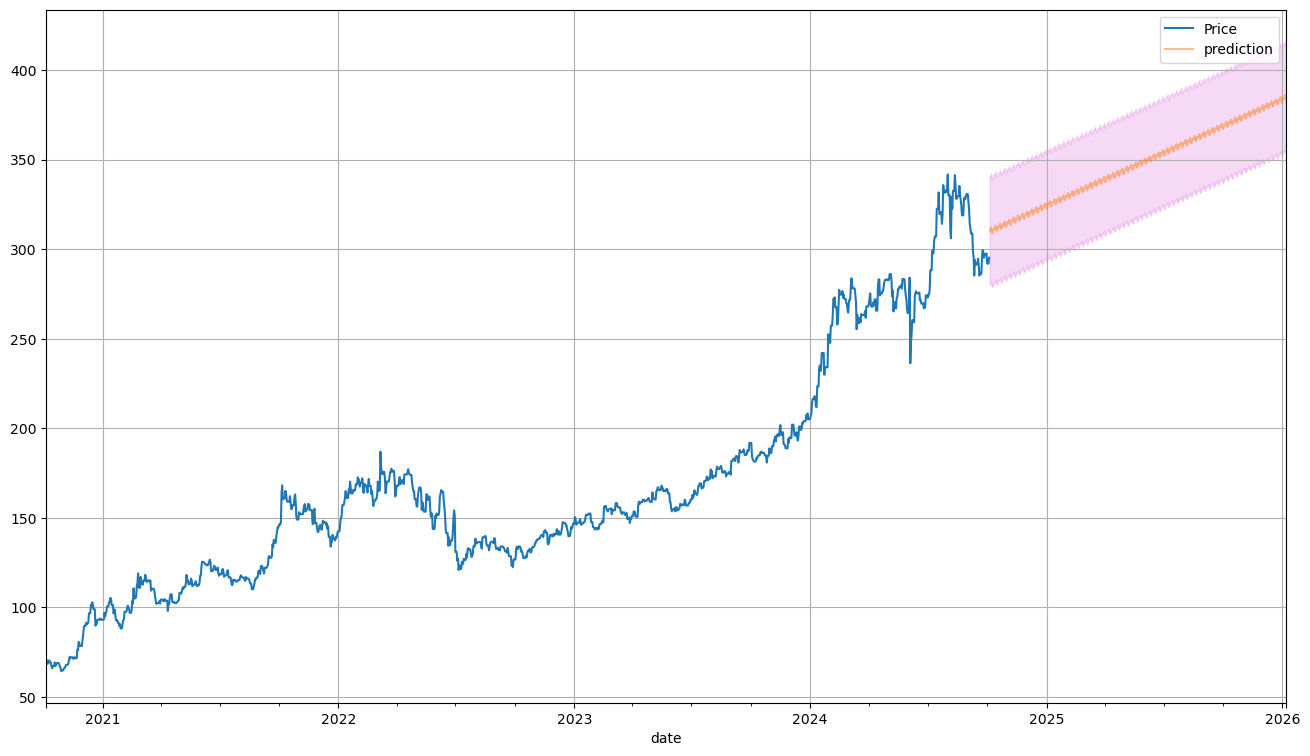

In [319]:
axis = df.plot(label = 'Actual' , figsize = (16,9))
pred_df['prediction'].plot(ax =axis , alpha=0.5)
axis.fill_between(pred_df.index,pred_df['lower_CI'], pred_df['upper_CI'],color ='m' , alpha=.15)
plt.legend()
plt.grid()
